In [13]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import normalize
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd

%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
data1 = load_wine()
data = pd.DataFrame(data1.data,columns=data1.feature_names)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [28]:
target = pd.DataFrame(data1.target, columns=["target"])
target["target"].unique()

array([0, 1, 2])

<IPython.core.display.Javascript object>

In [5]:
data.shape

(178, 13)

In [6]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
#No nulls are detected
data.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [8]:
#Normalization is done although it is not strictly needed in LDA
# The LDA for standardized and non-standardized features will be exactly the same
X = data.values

X_norm = normalize(X)


In [9]:
lda = LinearDiscriminantAnalysis(n_components = 2)
y = target.values
lda.fit(X_norm, y)

C:\Users\zahra\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=2, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [20]:
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(35, 10), dpi=400)

sns.heatmap(
    pd.DataFrame(lda.coef_, columns=data.columns, index=[lda.classes_]),
    ax=ax,
    cmap="RdBu",
    annot=True,
    annot_kws={"fontsize": 25},
)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylabel("Wine Type", fontsize=25)
plt.suptitle("LDA Feature Coefficients", fontsize=40)
pass

<IPython.core.display.Javascript object>

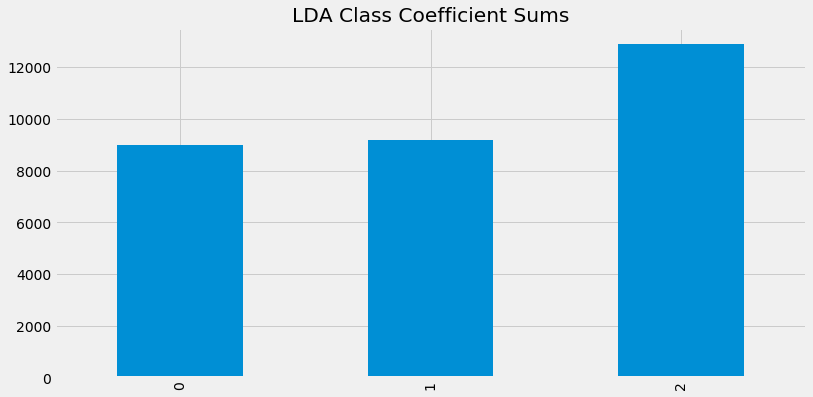

<IPython.core.display.Javascript object>

In [14]:
pd.Series(np.abs(lda.coef_).sum(axis=1), index=lda.classes_).sort_values().plot.bar(
    figsize=(12, 6), title="LDA Class Coefficient Sums"
)

# It is shown here the class 2 is the most separable one with regards to the LDA resuts.

In [21]:
lda.explained_variance_ratio_

array([0.64349292, 0.35650708])

<IPython.core.display.Javascript object>

C:\Users\zahra\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


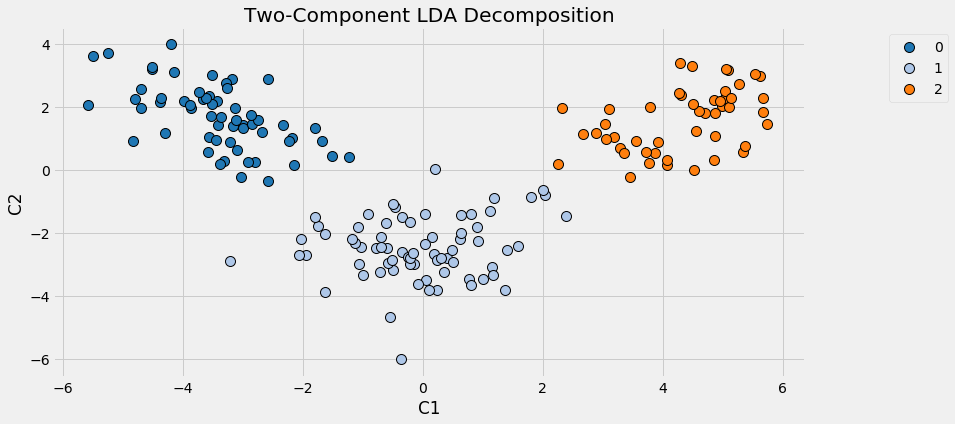

<IPython.core.display.Javascript object>

In [39]:
# The projection of X on
X_hat = lda.fit_transform(X, y)
target["target"] = target["target"].astype("category")
import matplotlib as mpl

colors = mpl.cm.get_cmap(name="tab20").colors
categories = target["target"].unique()
result = pd.DataFrame(
    {"C1": X_hat[:, 0], "C2": X_hat[:, 1], "Type": pd.Categorical(target["target"])}
)

fig, ax = plt.subplots(1, figsize=(12, 6))

for col, cat in zip(colors, categories):
    (
        result.query("Type == @cat")
        .plot.scatter(
            x="C1",
            y="C2",
            color=col,
            label=cat,
            ax=ax,
            s=100,
            edgecolor="black",
            linewidth=1,
            title="Two-Component LDA Decomposition",
        )
        .legend(bbox_to_anchor=(1.2, 1))
    )

## PCA on the same dataset

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

<IPython.core.display.Javascript object>

In [41]:
pca.explained_variance_ratio_

array([0.99809123, 0.00173592])

<IPython.core.display.Javascript object>

In [43]:
pca.components_

array([[ 1.65926472e-03, -6.81015556e-04,  1.94905742e-04,
        -4.67130058e-03,  1.78680075e-02,  9.89829680e-04,
         1.56728830e-03, -1.23086662e-04,  6.00607792e-04,
         2.32714319e-03,  1.71380037e-04,  7.04931645e-04,
         9.99822937e-01],
       [ 1.20340617e-03,  2.15498184e-03,  4.59369254e-03,
         2.64503930e-02,  9.99344186e-01,  8.77962152e-04,
        -5.18507284e-05, -1.35447892e-03,  5.00440040e-03,
         1.51003530e-02, -7.62673115e-04, -3.49536431e-03,
        -1.77738095e-02]])

<IPython.core.display.Javascript object>

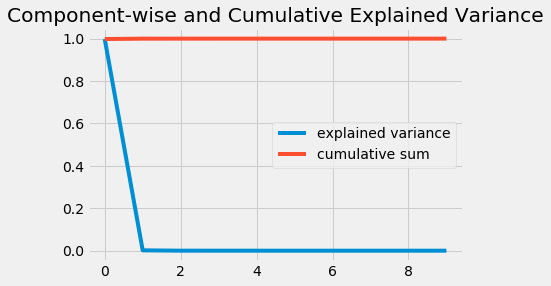

<IPython.core.display.Javascript object>

In [52]:
pca = PCA(n_components=10)
X_r = pca.fit(X).transform(X)

plt.plot(range(10), pca.explained_variance_ratio_, label="explained variance")
plt.plot(range(10), np.cumsum(pca.explained_variance_ratio_), label="cumulative sum")
plt.title("Component-wise and Cumulative Explained Variance")
plt.legend()
pass